In [77]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter

sns.set()

In [78]:
df = pd.read_excel(r'C:\Users\steve\Documents\Winter 2024 Classes\FNCE 443\Stocktrack Returns.xlsx',sheet_name='Returns')

In [79]:
df['S&P Cumulative Returns'] = df['S&P Returns'].cumsum()
df['Portfolio Cumulative Returns'] = df['Portfolio Returns'].cumsum()

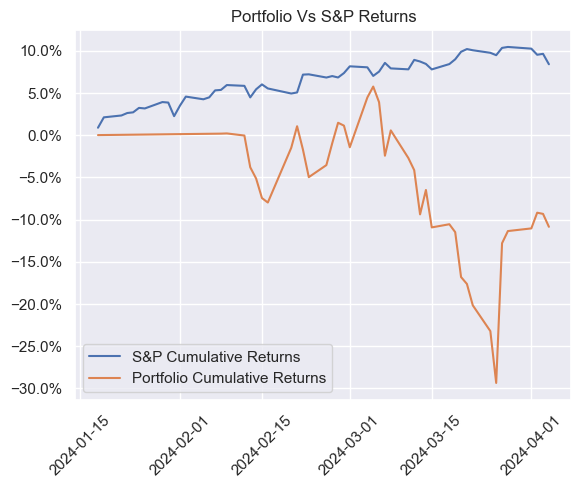

In [80]:
plt.plot(df['Date'],df['S&P Cumulative Returns'],label='S&P Cumulative Returns')
plt.plot(df['Date'],df['Portfolio Cumulative Returns'],label='Portfolio Cumulative Returns')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Portfolio Vs S&P Returns")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

In [81]:
def calc_sharpe(series):
   return (np.mean(series) - 0.0002)/np.std(series)

portfolio_sharpe = calc_sharpe(df['Portfolio Returns'])
market_sharpe = calc_sharpe(df['S&P Returns'])
print("Portfolio Sharpe",format(portfolio_sharpe,".3%"))
print("Market Sharpe",format(market_sharpe,".3%"))

Portfolio Sharpe -6.469%
Market Sharpe 19.156%


In [82]:
rf = 0.0002
x1 = df['S&P Returns'] - rf
y = df['Portfolio Returns'] - rf

In [90]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Portfolio Returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.06859
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.794
Time:                        12:12:09   Log-Likelihood:                 105.75
No. Observations:                  54   AIC:                            -207.5
Df Residuals:                      52   BIC:                            -203.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0020      0.005     -0.409      

In [84]:
treynor = (np.mean(df['Portfolio Returns']) - rf)/model.params[1]
treynor

0.012612981640375456

In [85]:
df['S&P Returns'].describe()

count    54.000000
mean      0.001556
std       0.007143
min      -0.016106
25%      -0.002603
50%       0.001104
75%       0.006194
max       0.021123
Name: S&P Returns, dtype: float64

In [76]:
df['Portfolio Returns'].describe()

count    54.000000
mean     -0.002010
std       0.034485
min      -0.063322
25%      -0.017750
50%       0.000082
75%       0.002428
max       0.165524
Name: Portfolio Returns, dtype: float64

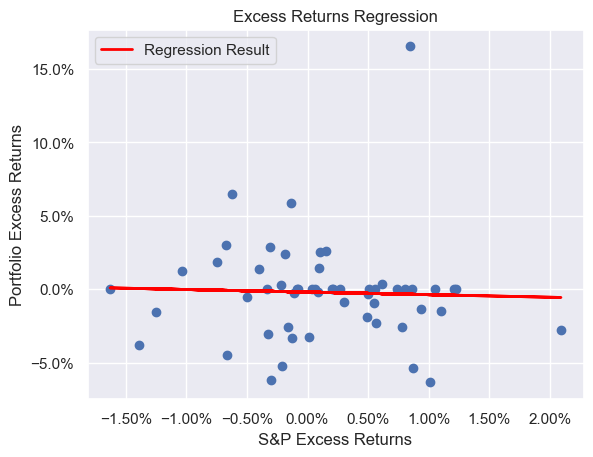

In [89]:

y_hat = model.predict(x)
plt.scatter(x1,y)
plt.plot(x1,y_hat,c='red',label='Regression Result',lw=2)
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.title("Excess Returns Regression")
plt.xlabel("S&P Excess Returns")
plt.ylabel("Portfolio Excess Returns")
plt.show()